# About the data

### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
Hungarian: 294 observations
*Switzerland: 123 observations
*Long Beach VA: 200 observations
*Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

**The dataset can be downloaded from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download)**

# EDA for heart failure dataset

### Let's look at the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import io
import requests
import plotly.express as px
from scipy import stats

In [62]:
data = pd.read_csv('https://github.com/Balan666/ITMO_ScientificPython_2024/raw/HW4/HW4/heart.csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Seems like all the column types are correct, except of HeartDisease, we will change it later to categorial type.

Let's look at the data distributions and features:

In [6]:
data[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]].describe() #continuous variables

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


Data is not normalized, for building a model it's better to log normalize (or use another ways).

As for categorial  values, let's look closer:

### Distributions

<Axes: xlabel='HeartDisease', ylabel='count'>

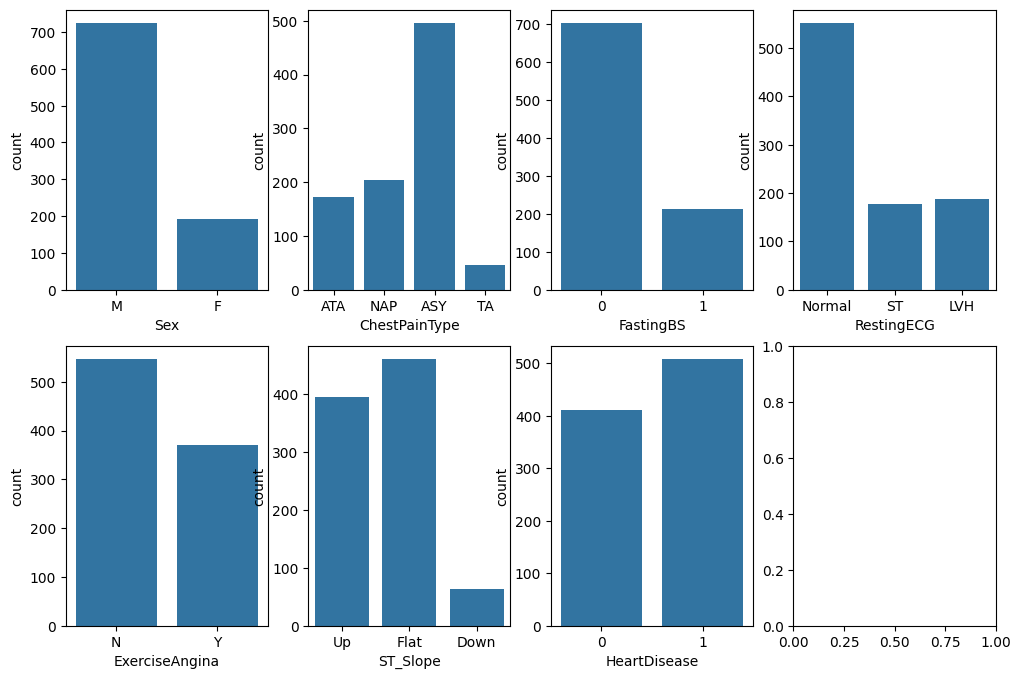

In [8]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.pyplot.subplots(2, 4, figsize = (12, 8))

#create chart in each subplot
sns.countplot(data, x="Sex", ax=axes[0,0])
sns.countplot(data, x="ChestPainType", ax=axes[0,1])
sns.countplot(data, x="FastingBS", ax=axes[0,2])
sns.countplot(data, x="RestingECG", ax=axes[0,3])
sns.countplot(data, x="ExerciseAngina", ax=axes[1,0])
sns.countplot(data, x="ST_Slope", ax=axes[1,1])
sns.countplot(data, x="HeartDisease", ax=axes[1,2])

There are much more of some values than a half, e.g., HeartDisease and Sex will probably correlate, since there are simply more man than women in this dataset, and more ill patients than healthy. This may be because of bad observation design or simply because there is a real correlation. We can't know for sure if the correlation will be due to the design or the real state of things. For now let's trust the data and take seriously all the correlations

What about numerical data distributions?

<Axes: xlabel='Oldpeak'>

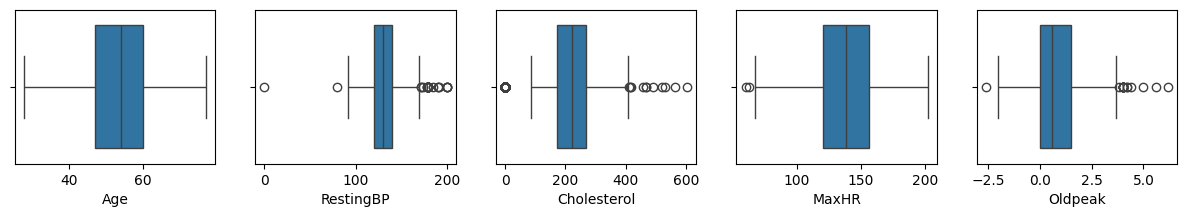

In [9]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.pyplot.subplots(1, 5, figsize = (15, 2))

#create chart in each subplot
sns.boxplot(data, x="Age", ax=axes[0])
sns.boxplot(data, x="RestingBP", ax=axes[1])
sns.boxplot(data, x="Cholesterol", ax=axes[2])
sns.boxplot(data, x="MaxHR", ax=axes[3])
sns.boxplot(data, x="Oldpeak", ax=axes[4])


In [10]:
data[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]].skew()

Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality:

In [150]:
for i in ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]:
  print(stats.normaltest(data[i]))

NormaltestResult(statistic=14.387278957845862, pvalue=0.0007513496172395723)
NormaltestResult(statistic=80.15332964094773, pvalue=3.934826751861588e-18)
NormaltestResult(statistic=50.09695629245791, pvalue=1.3230740789245988e-11)
NormaltestResult(statistic=15.83254859125781, pvalue=0.0003647587814373257)
NormaltestResult(statistic=139.06085036801633, pvalue=6.357992601318172e-31)


The most of the data seems to be not normally distributed. Maybe it'll be fixed after removing outliers. for building models it's not nessesary to normalize, but it is important for counting statistics

### Correlations

Let's quickly look at all the features and try to catch the correlations, both between the crossing features and HeartDisease:

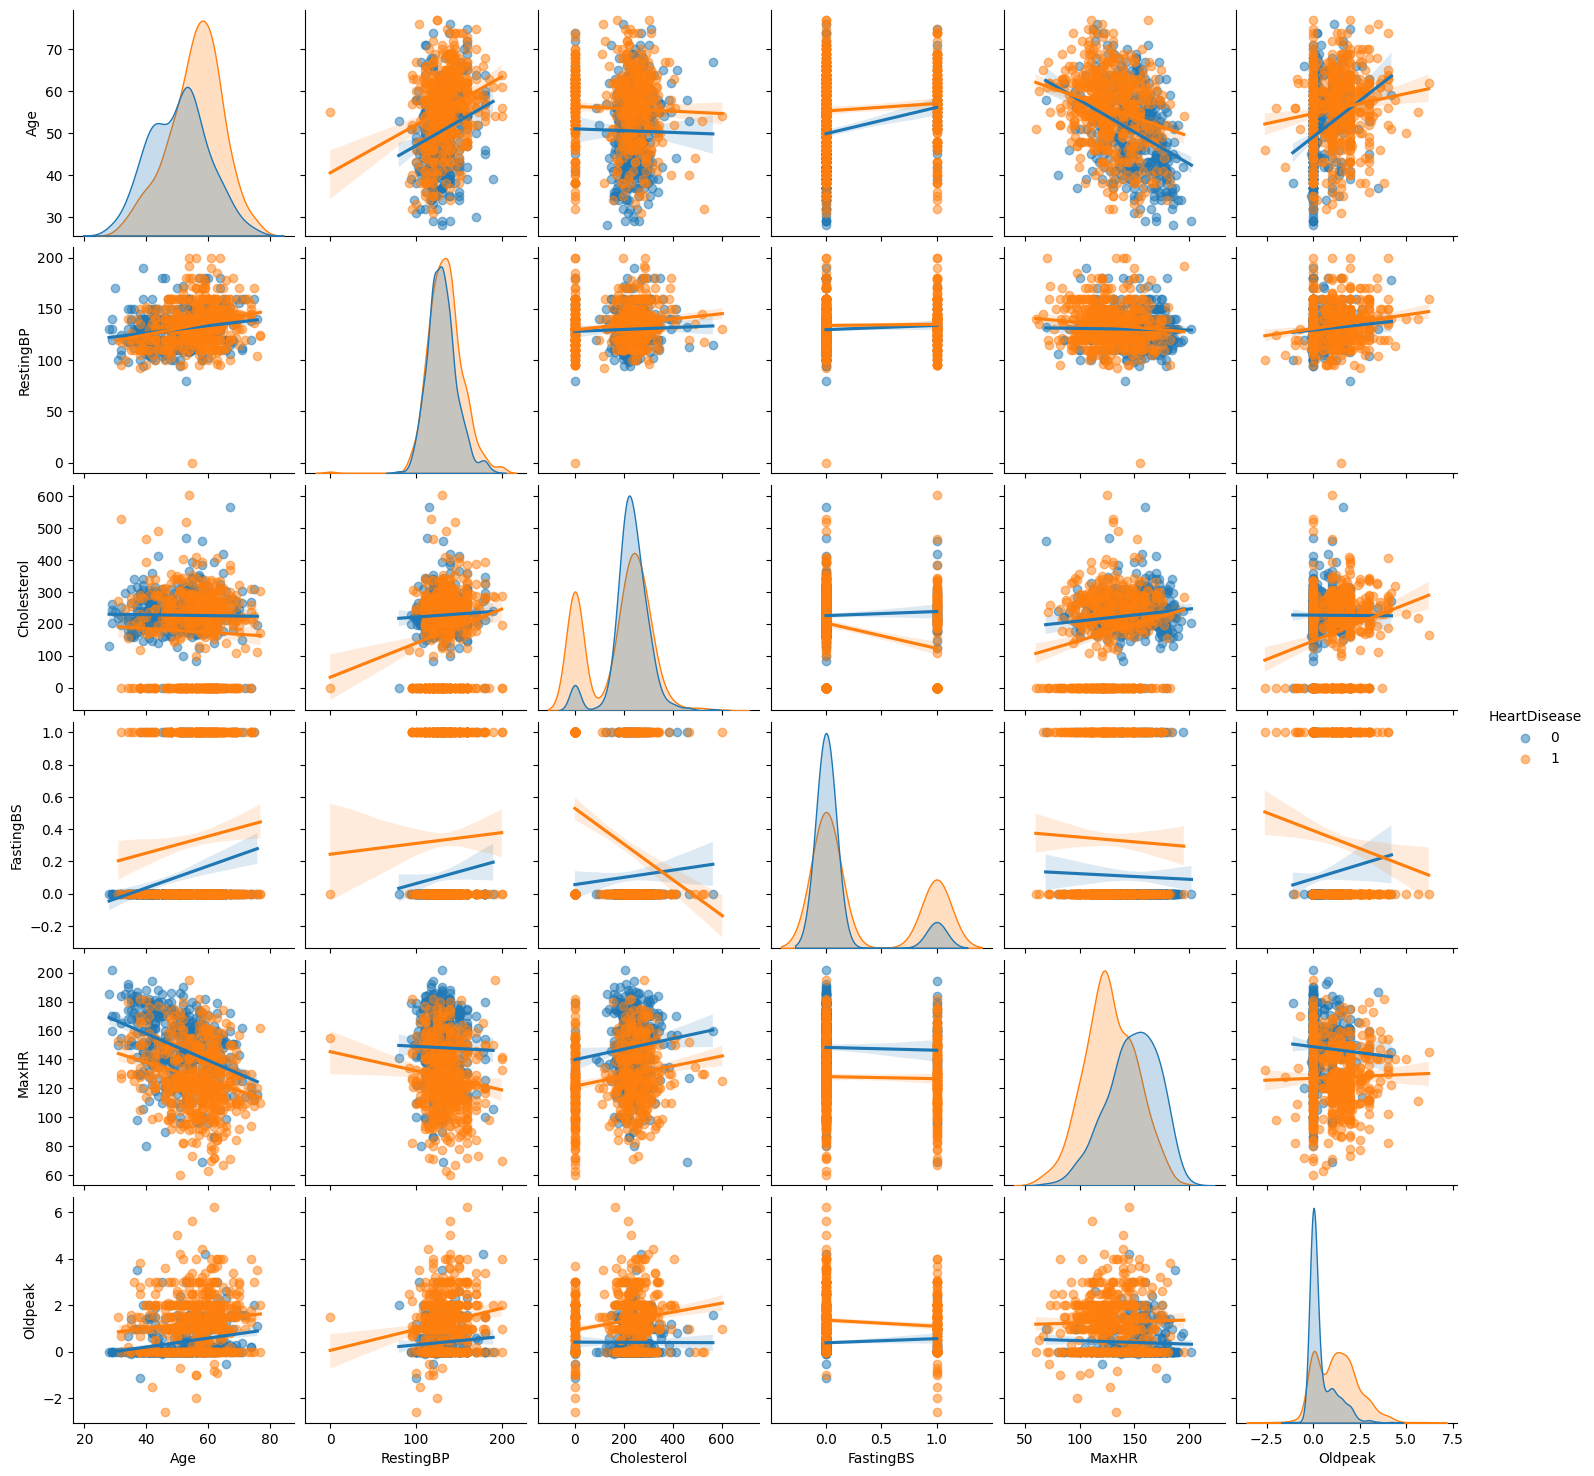

In [11]:
sns.pairplot(data, hue="HeartDisease", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})

E.g., it can be clearly seen, that older people get heartDiseases more often:

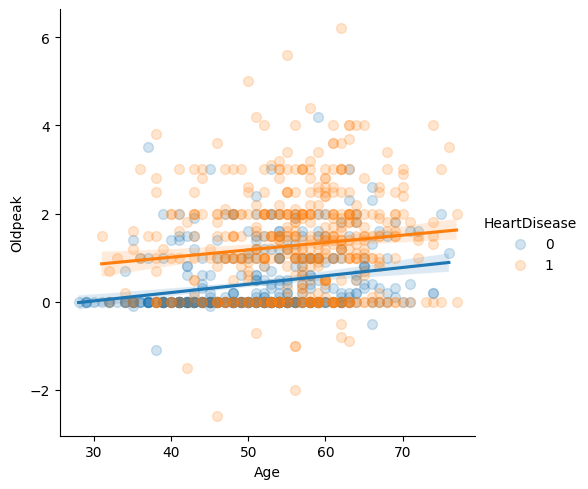

In [12]:
sns.lmplot(data, hue="HeartDisease", x="Age", y="Oldpeak", scatter_kws={"s": 50, "alpha": 0.2})

As For Numerical data it's easier to just count the correlation of HeartDisease "dummy" and all the variables:

In [19]:
data[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]].apply(lambda x: x.corr(data.HeartDisease))

Age            0.282039
RestingBP      0.107589
Cholesterol   -0.232741
MaxHR         -0.400421
Oldpeak        0.403951
dtype: float64

MaxHR and Oldpeak strongly correlate with Heart desease. Cholesterol and MaxHR correlate negatively, the rest - positively.

Now let's look at the correlation between numerical variables with each other:

In [13]:
corr_data = data[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]].corr()

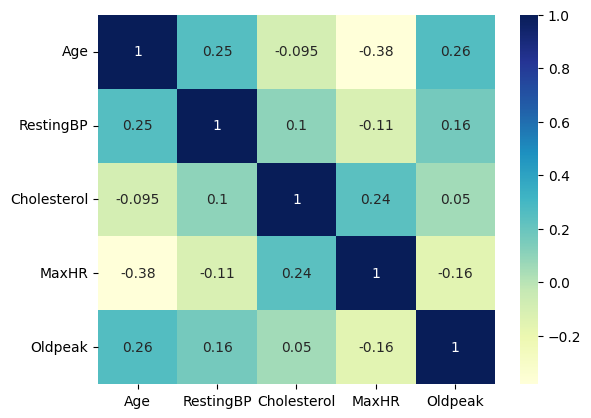

In [14]:
# plotting correlation heatmap
dataplot = sns.heatmap(corr_data, cmap="YlGnBu", annot=True)

Some of the variables correlate, but not strongly, so we can include all of them in the models

Now let's look at categorial features counts:

In [144]:
pd.crosstab([data.ST_Slope, data.FastingBS], data.ExerciseAngina, margins=True).style.background_gradient(cmap='YlOrRd')

If ST_Slope is Up, most probably there is no heart disease, but if its flat, most probably there will be desease, especially if FastingBS is 0:

In [145]:
pd.crosstab([data.ST_Slope, data.FastingBS], data.HeartDisease, margins=True).style.background_gradient(cmap='YlOrRd')

In [151]:
pd.crosstab([data.RestingECG, data.Sex], data.ChestPainType, margins=True).style.background_gradient(cmap='YlOrRd')

It's hard to look at the pure numbers, so let's look at them dependinng on heartDisease:

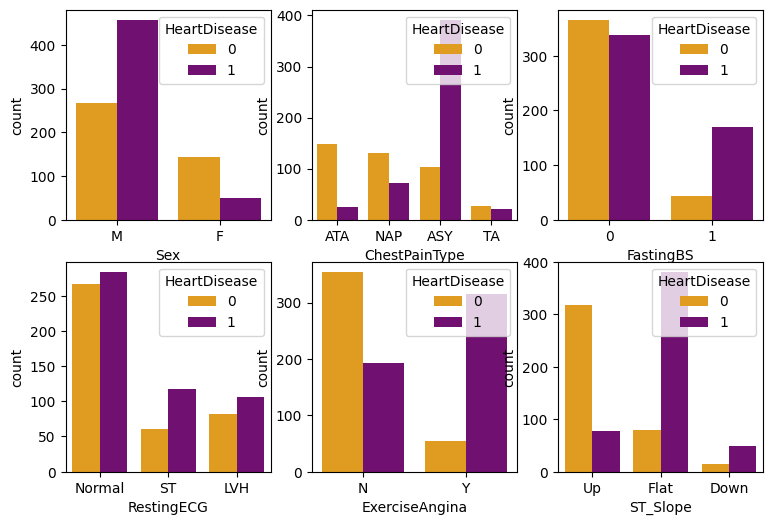

In [17]:
fig, ax = plt.pyplot.subplots(2, 3, figsize = (9, 6))
for indx, (column, axes) in list(enumerate(list(zip(['Sex', 'ChestPainType','FastingBS','RestingECG',
                          'ExerciseAngina', 'ST_Slope','HeartDisease'], ax.flatten())))):
    if column not in 'HearDisease':
        sns.countplot(ax = axes, x = data[column], hue = data['HeartDisease'], palette = ["orange", "purple"], alpha = 1)
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'HeartDisease', loc = 'upper right')
axes_legend[2].legend(title = 'HeartDisease', loc = 'upper right')
#plt.show()

HeartDisease is mostly seen with:

* Sex (Male)
* PainType (ASY)
* FastingBS(1)
* EscerciseAngina (Yes)
* ST_Slope (Flat)

We can also combine numericaal and categorical data on one graph. Here it can be seen that Aged people are endangered, cholesterol correlates with disease a bit, and if the patient feels ASY chest pain, it's most probably a heart disease

In [20]:
fig = px.scatter(data,
                 x=data.Age,
                 y=data.Cholesterol,
                 color=data.HeartDisease,
                 facet_col=data.ChestPainType,
                 facet_row=data.Sex,
                 color_continuous_scale=["orange", "purple"],
                 width=950,
                 height=800,
                 title="Heart disease spread")
fig.show()

### Fixing data

The best column type for a binary value is "bool" or "category" with two categories (e.g., True/False or 0/1). So we need to change the "Heartdisease" type to boolean or categorial to avoid futher errors.

In [23]:
data["HeartDisease"] = data["HeartDisease"].astype("category")

Also we need to get rid of NaNs and outliers in the dataset

In [24]:
data.isna().sum() #no missing data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

we are calculating the Z scores for the column in the DataFrame using the zscore function from the SciPy stats module. The resulting array z contains the absolute Z scores for each data point in the column, indicating how many standard deviations each value is from the mean.

In [139]:
no_outliers = data.copy()

# Select the numerical columns
numerical_cols = no_outliers.select_dtypes(include=[np.number]).columns

# Calculate the IQR for each numerical column
iqr = no_outliers[numerical_cols].apply(lambda col: col.quantile(0.75) - col.quantile(0.25))

# Define the lower and upper bounds
lower_bound = iqr * 1.5
upper_bound = iqr * 1.5

# Create boolean masks for outlier rows
outlier_masks = []
for col in numerical_cols:
    outlier_masks.append((no_outliers[col] < (no_outliers[col].quantile(0.25) - lower_bound[col])) | (no_outliers[col] > (no_outliers[col].quantile(0.75) + upper_bound[col])))

# Combine the boolean masks into a single mask
outlier_mask = pd.concat(outlier_masks, axis=1).any(axis=1)

# Drop the outlier rows
no_outliers = no_outliers[~outlier_mask]

<Axes: xlabel='Oldpeak', ylabel='Count'>

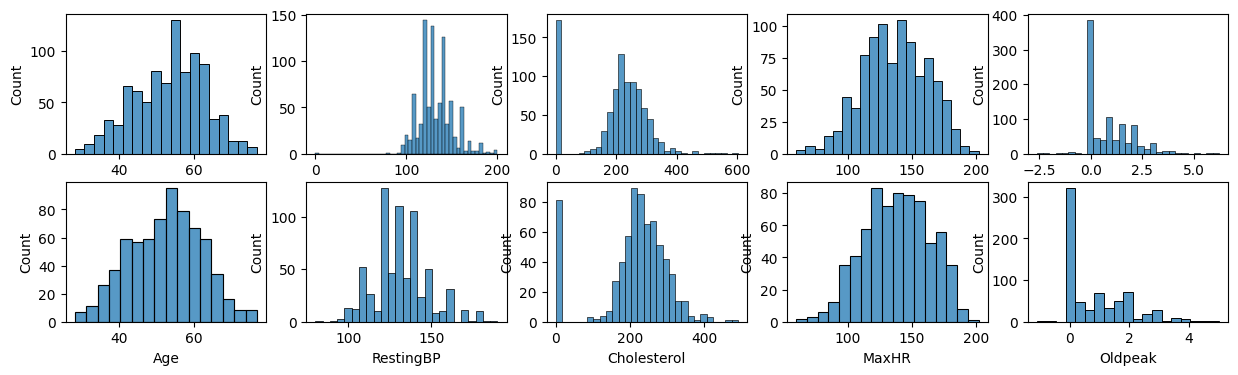

In [140]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.pyplot.subplots(2, 5, figsize = (15, 4))

#create chart in each subplot
sns.histplot(data, x="Age", ax=axes[0,0])
sns.histplot(data, x="RestingBP", ax=axes[0,1])
sns.histplot(data, x="Cholesterol", ax=axes[0,2])
sns.histplot(data, x="MaxHR", ax=axes[0,3])
sns.histplot(data, x="Oldpeak", ax=axes[0,4])

sns.histplot(no_outliers, x="Age", ax=axes[1,0])
sns.histplot(no_outliers, x="RestingBP", ax=axes[1,1])
sns.histplot(no_outliers, x="Cholesterol", ax=axes[1,2])
sns.histplot(no_outliers, x="MaxHR", ax=axes[1,3])
sns.histplot(no_outliers, x="Oldpeak", ax=axes[1,4])